In [111]:
import torch
from torch import nn # nn contains all PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## Data Preparation

Data can be anything :
* CSV
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio
* DNA
* Text

Machine learning is a game of two parts :

    1. Data to numeric
    2. Build a model to learn pattern of that data

##### Creating data(straingt line) using linear regression formula

`y = a + bX` (a is bias , b is weight)

In [3]:
# Creating *know* parameter
weight = 0.7
bias = 0.3

# Create

start = 0
stop = 1
step = 0.02
X = torch.arange(start, stop, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# Splitting data into training and test set

train_split = int(80 * len(X) / 100)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

#### Visualizing

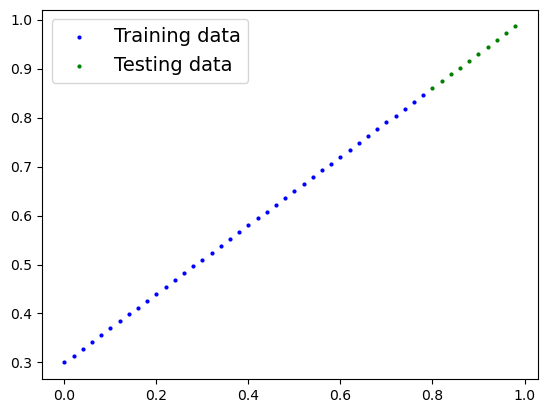

In [5]:
def plot_predictions(y_preds = None):
    plt.scatter(X_train, y_train, c = 'blue', s = 4, label = "Training data")
    plt.scatter(X_test, y_test, c = 'green', s = 4, label = "Testing data")
        
    if y_preds is not None:
        plt.scatter(X_test, y_preds, c = 'red', s = 4, label = "Predictions")
    
    plt.legend(prop = {"size" : 14})
    plt.show()
    
plot_predictions()

### Building a model

* Logistic regression

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                              requires_grad = True,
                                              dtype = torch.float32))

        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float32))
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weight * x + self.bias # this is the linear regression formula

### Pytorch model building essentials

* `torch.nn` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclass require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Checking parameters of what's inside our model using `.parameters()`

In [180]:
# setting up random seed
torch.manual_seed(42)

# Creating an object/ instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Checking parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [181]:
# list models parameters.
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [182]:
# Making prediction using `torch.inference_mode()`
# when data is passeed through our model, it's going to run through the forward() methon

with torch.inference_mode():  # use this everytime to have clean predictions and also, in large datasets, predictions are faster.
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

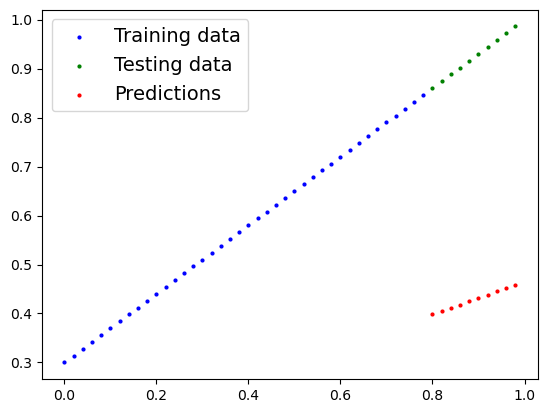

In [183]:
plot_predictions(y_preds)

In [184]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.001) # Learning rate is the most import hyperparameter. It changes the bias and weights(predictions) value to match the y_test value

### Building a training loop (and a testing loop) in PyTorch

* Loop through the data
* Forward pass (this involves data moving through out model's `forward()` function to make predictions (also called forward propagation)
* Calculate the loss (compare forward pass predictions to ground truth labels)
* Optimizer zero grad
* Loss backward - moves backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**back propagation**)
* Optimizer step - use optimizer to adjust our model's parameters to try and improve the loss (**gradient(slope) descent**)

In [185]:
torch.manual_seed(42)


# Epoch is the loop through the data
epochs = 2000   # hyperparameter because we set it up ourself

epoch_count = []
train_loss = []
test_loss_values = []


### Training loop
# Loop through the data
for epoch in range(epochs):
    epoch_count.append(epoch)
    # Set the model to training mode
    model_0.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    
    # Forward pass
    y_pred = model_0(X_train)
    
    
    # Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss : {loss}")
    
    train_loss.append(loss)
    
    #  Zero the gradients of the optimizer (they accumulate by default)
    optimizer.zero_grad()
    
    
    # Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    
    # Step the optimizer (perform gradient descent)
    optimizer.step() # by default, optimizer saves the previous value which needs to be reset every the loop runs.
    
    
#     print(model_0.state_dict())





    ### Testing
    # Putting the model in evaluation mode
    model_0.eval() # turns off different settings in the model not needed for evaluations/ testing

    with torch.inference_mode(): # turns off gradient tracking
        
        # Forward pass
        test_preds = model_0(X_test)

        # Calculate the loss
        test_loss = loss_fn(test_preds, y_test)

        test_loss_values.append(test_loss)
        if epoch % 10 == 0:
            print(f"Epoch : {epoch}) | Loss : {loss} | Test loss : {test_loss}")
            print(model_0.state_dict())

   


Loss : 0.31288138031959534
Epoch : 0) | Loss : 0.31288138031959534 | Test loss : 0.4931890368461609
OrderedDict([('weight', tensor([0.3371])), ('bias', tensor([0.1298]))])
Loss : 0.3117292523384094
Loss : 0.3105771541595459
Loss : 0.3094250559806824
Loss : 0.30827295780181885
Loss : 0.3071208596229553
Loss : 0.3059687614440918
Loss : 0.3048166334629059
Loss : 0.30366456508636475
Loss : 0.3025124669075012
Loss : 0.3013603389263153
Epoch : 10) | Loss : 0.3013603389263153 | Test loss : 0.4797181189060211
OrderedDict([('weight', tensor([0.3410])), ('bias', tensor([0.1398]))])
Loss : 0.30020827054977417
Loss : 0.29905614256858826
Loss : 0.2979040741920471
Loss : 0.2967519462108612
Loss : 0.29559987783432007
Loss : 0.29444774985313416
Loss : 0.293295681476593
Loss : 0.2921435832977295
Loss : 0.2909914553165436
Loss : 0.28983938694000244
Epoch : 20) | Loss : 0.28983938694000244 | Test loss : 0.4662471413612366
OrderedDict([('weight', tensor([0.3449])), ('bias', tensor([0.1498]))])
Loss : 0.28

Loss : 0.03748577460646629
Loss : 0.0374508798122406
Loss : 0.03741598129272461
Epoch : 620) | Loss : 0.03741598129272461 | Test loss : 0.08766057342290878
OrderedDict([('weight', tensor([0.5140])), ('bias', tensor([0.3779]))])
Loss : 0.03738107532262802
Loss : 0.03734617680311203
Loss : 0.03731127828359604
Loss : 0.03727637603878975
Loss : 0.03724147006869316
Loss : 0.03720656782388687
Loss : 0.03717166930437088
Loss : 0.03713676333427429
Loss : 0.0371018648147583
Loss : 0.037067197263240814
Epoch : 630) | Loss : 0.037067197263240814 | Test loss : 0.08662726730108261
OrderedDict([('weight', tensor([0.5157])), ('bias', tensor([0.3774]))])
Loss : 0.037033338099718094
Loss : 0.036998435854911804
Loss : 0.036964669823646545
Loss : 0.036929916590452194
Loss : 0.036895763128995895
Loss : 0.03686138987541199
Loss : 0.036826856434345245
Loss : 0.03679286316037178
Loss : 0.03675796836614609
Loss : 0.03672432154417038
Epoch : 640) | Loss : 0.03672432154417038 | Test loss : 0.08579986542463303
O

Loss : 0.016151126474142075
Loss : 0.016116898506879807
Epoch : 1240) | Loss : 0.016116898506879807 | Test loss : 0.03759966418147087
OrderedDict([('weight', tensor([0.6200])), ('bias', tensor([0.3336]))])
Loss : 0.016082221642136574
Loss : 0.016048375517129898
Loss : 0.01601347327232361
Loss : 0.015979699790477753
Loss : 0.01594495214521885
Loss : 0.015910785645246506
Loss : 0.015876421704888344
Loss : 0.015841882675886154
Loss : 0.015807893127202988
Loss : 0.015772998332977295
Epoch : 1250) | Loss : 0.015772998332977295 | Test loss : 0.036772288382053375
OrderedDict([('weight', tensor([0.6217])), ('bias', tensor([0.3329]))])
Loss : 0.015739355236291885
Loss : 0.01570446975529194
Loss : 0.015670450404286385
Loss : 0.015635941177606583
Loss : 0.015601545572280884
Loss : 0.015567416325211525
Loss : 0.015532639808952808
Loss : 0.015498891472816467
Loss : 0.015463987365365028
Loss : 0.01543011236935854
Epoch : 1260) | Loss : 0.01543011236935854 | Test loss : 0.03601359575986862
OrderedDic

Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Epoch : 1880) | Loss : 0.0004444979131221771 | Test loss : 0.0005780101055279374
OrderedDict([('weight', tensor([0.6997])), ('bias', tensor([0.3008]))])
Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Epoch : 1890) | Loss : 0.0004444979131221771 | Test loss : 0.0005780101055279374
OrderedDict([('weight', tensor([0.6997])), ('bias', tensor([0.3008]))])
Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Loss : 0.0007075972971506417
Loss : 0.0004444979131221771
Loss : 0.0007075972971506417
Loss : 0.000444497913122177

In [186]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6994])), ('bias', tensor([0.2998]))])

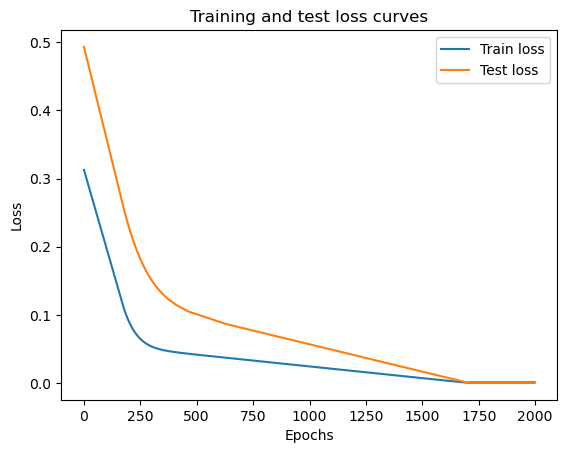

In [187]:
plt.plot(epoch_count, np.array(torch.tensor(train_loss).cpu().numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

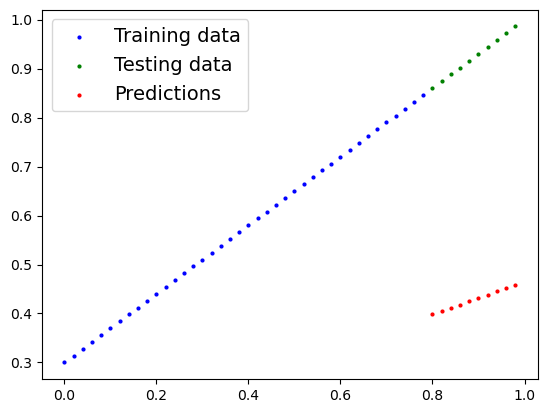

In [188]:
plot_predictions(y_preds)

### Inorder to have more accurate result, Learning rate and epochs can be changed.

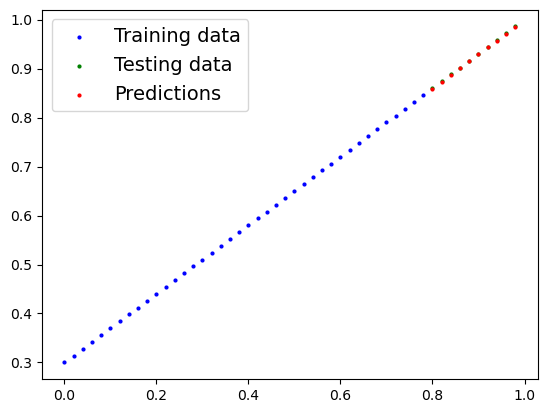

In [189]:
plot_predictions(test_preds)

### Saving and Loading a model

There are three main methods.

1. `torch.save()` - saves the model in pickle format
2. `torch.load()` - loads the saved PyTorch object/model
3. `torch.nn.Module.load_state_dict()` - loads a model's saved state dictionary

In [197]:
from pathlib import Path

# Create Models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True) # if already exists, wont throw error

# Create Model save path
MODEL_NAME = "basic_neural_netork_model(state_dict()).pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save Model State_dict()
print(f"Saving model state_dict() to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
          f = MODEL_SAVE_PATH)



Saving model state_dict() to : models\basic_neural_netork_model(state_dict()).pth


In [200]:
# Create Model save path
FULL_MODEL_NAME = "basic_neural_netork_model(state_dict()).pth"
MODEL_SAVE_PATH = MODEL_PATH / FULL_MODEL_NAME


# Save entire Model
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0,
          f = MODEL_SAVE_PATH)


Saving model to : models\basic_neural_netork_model(state_dict()).pth
